# TP Integrador

Detecci√≥n de anomal√≠as en esc√°neres de rayos X de equipajes mediante aprendizaje profundo. El modelo identifica 5 objetos potencialmente peligrosos: pistola, cuchillo, alicates, tijeras y llave inglesa, lo que facilita la vigilancia inteligente en los sistemas de seguridad de los aeropuertos.

Data set: https://www.kaggle.com/datasets/orvile/x-ray-baggage-anomaly-detection/data

## Integrantes:
- Martin Paz
- Matias Tripode

## 1) Cargar el Dataset

In [3]:
!pip install torchmetrics
!pip install --upgrade --no-cache-dir gdown

# Clonar YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

%pip install albumentations opencv-python-headless


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 983.0/983.0 kB 14.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 30.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

import torch
import torchvision
import torchsummary
import torchmetrics
from torch.utils.tensorboard import SummaryWriter

In [2]:
%cd /content/

/content


In [ ]:

# https://drive.google.com/file/d/19N6Q7qRJMzfro47SBCc0PY8pUXnPZOhI/view?usp=drive_link

# El ID sera: 19N6Q7qRJMzfro47SBCc0PY8pUXnPZOhI
!gdown --id 19N6Q7qRJMzfro47SBCc0PY8pUXnPZOhI

!unzip x-ray-baggage-anomaly-detection.zip > /dev/null

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19N6Q7qRJMzfro47SBCc0PY8pUXnPZOhI
From (redirected): https://drive.google.com/uc?id=19N6Q7qRJMzfro47SBCc0PY8pUXnPZOhI&confirm=t&uuid=e46109ea-cd3c-438f-b6cf-b29f15c3e9e4
To: /content/x-ray-baggage-anomaly-detection.zip
100% 140M/140M [00:04<00:00, 34.3MB/s]


## 2) EDA

**Problema a resolver**
Detecci√≥n y clasificaci√≥n de objetos potencialmente peligrosos: pistola, cuchillo, alicates, tijeras y llave ingles en imagenes de scanner a equipajes en aeropuertos. Las m√©tricas a utilizar deben considerar tanto la precisi√≥n de la clase como la localizaci√≥n del objeto (bounding box).


El analisis EDA se compone de los siguientes items:

1. Entendiento la estructura del dataset
2. Cuantas clases distintas tenemos?
3. Visualizaci√≥n preliminar de algunos los datos
4. An√°lisis de Distribuci√≥n de Clases
5. An√°lisis del tama√±o de las im√°genes
6. Verificar si hay fotos sin etiquetas
7. An√°lisis de Bounding Boxes por clase
8. Ver la distribuci√≥n de la relaci√≥n porcentual entre los tama√±os de los bounding box y las im√°genes.
8. CONCLUSIONES


### 1). Entendiento la estructura del dataset

Primero vamos a entder la extractura del dataset. Vemos que tiene tres carpetas `test`, `train` y `valid`. Dentro de cada una tienen `images` and labels.
Como ejemplo:
```
train/
‚îú‚îÄ‚îÄ images/
‚îÇ   ‚îî‚îÄ‚îÄ 009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a.jpg
‚îî‚îÄ‚îÄ labels/
    ‚îî‚îÄ‚îÄ 009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a.txt
```

Los archivos `labels` contienen una sola linea con formato:
 <class_id> <x_center> <y_center> <width> <height>

Ejemplo:

`2 0.6538461538461539 0.5420673076923077 0.0625 0.06610576923076923`





### 2). Cuantas clases distintas tenemos?

In [ ]:
def analyze_classes(labels_folder):
    class_ids = set()
    for label_file in os.listdir(labels_folder):
        with open(os.path.join(labels_folder, label_file), 'r') as f:
            for line in f:
                class_id = int(line.strip().split()[0])
                class_ids.add(class_id)

    print(f"Identificador de clase: {sorted(class_ids)}")
    return sorted(class_ids)

class_ids = analyze_classes('./train/labels')

Identificador de clase: [0, 1, 2, 3, 4]


Vemos que hay **5 clases** diferentes indicadas con numeros: `0, 1, 2, 3, 4`

### 3). Visualizaci√≥n preliminar de algunos los datos

Vamos a visualizar una imagen de cada clase, tomada al azar, del conjunto de entrenamiento. Esto es para tener nocion de como lucen las im√°genes de nuestro set de datos. Esto nos ayudar√° a saber que tipos de transformaciones ser√°n m√°s √∫tiles cuando realicemos data augmentation.

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Configuraci√≥n de paths
train_images_path = './train/images'
train_labels_path = './train/labels'

def graficar_ejemplos(train_images_path, train_labels_path):
  # Crear un diccionario para organizar las im√°genes por clase
  class_images = {class_id: [] for class_id in range(5)}  # Asumiendo 5 clases (0-4)
  # Leer todas las im√°genes y organizarlas por clase
  for label_file in os.listdir(train_labels_path):
      if not label_file.endswith('.txt'):
          continue

      # Obtener el path de la imagen correspondiente
      image_file = label_file.replace('.txt', '.jpg')
      image_path = os.path.join(train_images_path, image_file)

      # Leer las anotaciones y registrar todas las clases presentes
      with open(os.path.join(train_labels_path, label_file), 'r') as f:
          for line in f:
              class_id = int(line.strip().split()[0])
              if image_path not in class_images[class_id]:  # Evitar duplicados
                  class_images[class_id].append(image_path)

  # Configurar el gr√°fico
  plt.figure(figsize=(80, 65))

  # Para cada clase
  for class_id in sorted(class_images.keys()):
      # Tomar 4 im√°genes aleatorias (o menos si no hay suficientes)
      sample_images = random.sample(class_images[class_id], min(4, len(class_images[class_id])))

      # Mostrar cada imagen
      for i, image_path in enumerate(sample_images):
          # Leer la imagen
          img = cv2.imread(image_path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          height, width = img.shape[:2]

          # Configurar subplot
          ax = plt.subplot(5, 4, class_id*4 + i + 1)
          plt.imshow(img)
          plt.title(f'Clase {class_id}\n{os.path.basename(image_path)[:10]}...')
          plt.axis('off')

          # Leer el archivo de anotaciones y dibujar los bounding boxes
          label_path = image_path.replace('.jpg', '.txt').replace('images', 'labels')
          if os.path.exists(label_path):
              with open(label_path, 'r') as f:
                  for line in f:
                      parts = line.strip().split()
                      current_class = int(parts[0])

                      # Solo dibujar bounding boxes de la clase actual
                      if current_class == class_id:
                          x_center = float(parts[1]) * width
                          y_center = float(parts[2]) * height
                          box_width = float(parts[3]) * width
                          box_height = float(parts[4]) * height

                          # Calcular coordenadas del bounding box
                          x_min = x_center - (box_width / 2)
                          y_min = y_center - (box_height / 2)

                          # Crear el rect√°ngulo
                          rect = patches.Rectangle(
                              (x_min, y_min), box_width, box_height,
                              linewidth=2, edgecolor='red', facecolor='none')
                          ax.add_patch(rect)
  plt.tight_layout()
  plt.suptitle('Ejemplos de Im√°genes por Clase con Bounding Boxes', y=1.02, fontsize=16)
  plt.show()


graficar_ejemplos(train_images_path, train_labels_path)

### 4). An√°lisis de Distribuci√≥n de Clases
Ahora vamos a analizar la distribuci√≥n de clases. Esto nos puede ayudar a identificar posibles desbalances entre clases.

Distribuci√≥n de clases:
Clase 0: 1284 instancias
Clase 1: 1393 instancias
Clase 2: 698 instancias
Clase 3: 1379 instancias
Clase 4: 1427 instancias
----


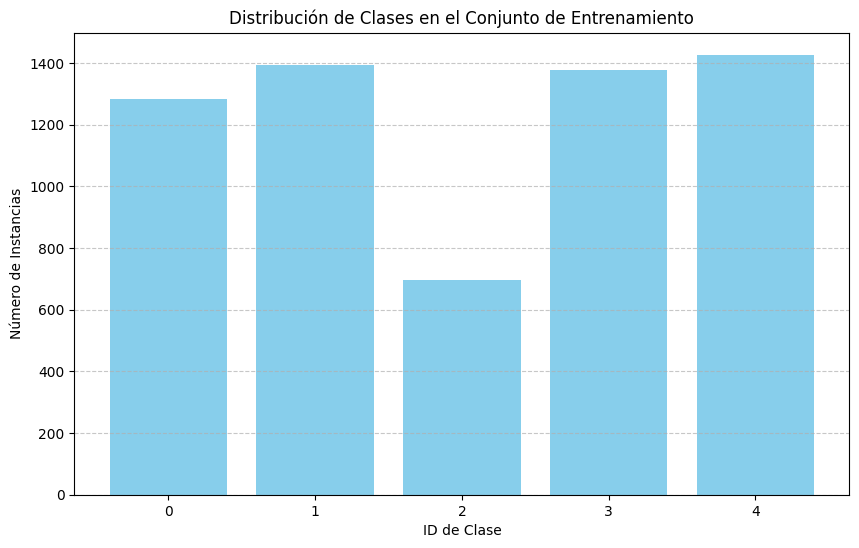

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

def analizar_distribucion_clases(ruta_etiquetas):
    # Contador para almacenar la frecuencia de cada clase
    contador_clases = Counter()

    # Recorrer todos los archivos de etiquetas
    for archivo_etiqueta in os.listdir(ruta_etiquetas):
        ruta_completa = os.path.join(ruta_etiquetas, archivo_etiqueta)

        try:
            with open(ruta_completa, 'r') as f:
                for linea in f:
                    # Cada l√≠nea representa un objeto en la imagen
                    clase_id = int(linea.strip().split()[0])
                    contador_clases[clase_id] += 1
        except Exception as e:
            print(f"Error procesando {archivo_etiqueta}: {e}")

    return contador_clases

# Ruta a las etiquetas de entrenamiento
ruta_etiquetas_train = './train/labels'

# Obtener distribuci√≥n de clases
distribucion = analizar_distribucion_clases(ruta_etiquetas_train)

# Mostrar resultados
print("Distribuci√≥n de clases:")
for clase_id, conteo in sorted(distribucion.items()):
    print(f"Clase {clase_id}: {conteo} instancias")

print("----")
# Visualizaci√≥n
plt.figure(figsize=(10, 6))
plt.bar(distribucion.keys(), distribucion.values(), color='skyblue')
plt.title('Distribuci√≥n de Clases en el Conjunto de Entrenamiento')
plt.xlabel('ID de Clase')
plt.ylabel('N√∫mero de Instancias')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Si conocemos los nombres de las clases, podemos personalizar los labels
# nombres_clases = {0: "Normal", 1: "Arma", 2: "Explosivo", ...}
# plt.xticks(list(nombres_clases.values()))

plt.show()

Vemos que Clase 2 tiene significativamente menos instancias (698) comparado con las dem√°s. Las otras clases est√°n relativamente balanceadas (1284-1427 instancias)

### 5). An√°lisis del tama√±o de las im√°genes

In [ ]:
import os
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def medir_las_fotos(carpeta_imagenes):
    print("Chequeando los tama√±os de las fotos...")

    tama√±os = defaultdict(int)
    problemas = []

    for archivo in os.listdir(carpeta_imagenes):
        try:
            # Leemos la imagen como si fuera un chori
            img = cv2.imread(os.path.join(carpeta_imagenes, archivo))
            if img is None:
                problemas.append(archivo)
                continue

            alto, ancho = img.shape[:2]
            tama√±os[(ancho, alto)] += 1

        except Exception as e:
            print(f"Error con {archivo}: {e}")
            problemas.append(archivo)

    # Mostramos los resultados
    print("\nResumen de tama√±os:")
    for tam, cant in sorted(tama√±os.items()):
        print(f"Tama√±o {tam}: {cant} fotos ({cant/len(os.listdir(carpeta_imagenes))*100:.1f}%)")

    if problemas:
        print(f"\n Error {len(problemas)} fotos (no se pudieron leer)")

    return tama√±os, problemas

carpeta_train = './train/images'
tama√±os, fotos_defectuosas = medir_las_fotos(carpeta_train)

Chequeando los tama√±os de las fotos...

Resumen de tama√±os:
Tama√±o (416, 416): 6181 fotos (100.0%)


Vemos que todas las `6181` (1284 + 1393+ 698 + 1379+ 1427) fotos tienen el mismo tama√±o ` (416, 416)`

### 6). Verificar si hay fotos sin etiquetas

In [ ]:
def comparar_con_y_sin_anotaciones(carpeta_imagenes, carpeta_etiquetas, ejemplos=5):
    print("\n Comparando fotos con y sin anotaciones...")

    # Buscamos fotos que tengan y no tengan anotaciones
    fotos_con_anotaciones = []
    fotos_sin_anotaciones = []

    todas_fotos = set(os.listdir(carpeta_imagenes))
    fotos_etiquetadas = set([f.replace('.txt', '.jpg') for f in os.listdir(carpeta_etiquetas)])

    fotos_sin_anotaciones = list(todas_fotos - fotos_etiquetadas)
    fotos_con_anotaciones = list(fotos_etiquetadas)

    print(f"Total fotos: {len(todas_fotos)}")
    print(f"Fotos con anotaciones: {len(fotos_con_anotaciones)}")
    print(f"Fotos sin anotaciones: {len(fotos_sin_anotaciones)}")

carpeta_etiquetas = './train/labels'
comparar_con_y_sin_anotaciones(carpeta_train, carpeta_etiquetas)


 Comparando fotos con y sin anotaciones...
Total fotos: 6181
Fotos con anotaciones: 6181
Fotos sin anotaciones: 0


Vemos que todas las fotos tienen sus etiquetas!

### 7) An√°lisis de Bounding Boxes por Clase

Con este an√°lisis buscamos: Saber si hay caracter√≠sticas que nos pueda ayudar a distinguir objetos dependiendo de las clases.

Para cada clase y los bounding boxes queremos entender:

- Proporci√≥n de objetos peque√±os (√°rea del box < 1% del √°rea de la imagen)
- Aspect ratios at√≠picos (ancho/alto < 0.2 o > 5.0)
- Promedio de objetos peligrosos por imagen

In [ ]:
from glob import glob
import os
from collections import defaultdict
import numpy as np

image_paths = sorted(glob('./train/images/*.jpg'))
label_paths = sorted(glob('./train/labels/*.txt'))

# Inicializaci√≥n
small_object_threshold = 0.01  # 1%
aspect_ratio_threshold_low = 0.2
aspect_ratio_threshold_high = 5.0

class_stats = {
    i: {
        "total": 0,
        "small": 0,
        "weird_aspect_ratio": 0,
        "images": set()
    } for i in range(5)
}

# Total im√°genes con al menos un objeto
images_with_objects = 0
total_objects = 0

for label_path in label_paths:
    with open(label_path, 'r') as f:
        lines = f.readlines()
        if not lines:
            continue  # sin objetos
        images_with_objects += 1

        for line in lines:
            try:
                class_id, x_c, y_c, w_box, h_box = map(float, line.strip().split())
                class_id = int(class_id)
            except:
                continue

            area = w_box * h_box
            aspect_ratio = w_box / h_box if h_box > 0 else 0

            class_stats[class_id]["total"] += 1
            total_objects += 1

            if area < small_object_threshold:
                class_stats[class_id]["small"] += 1

            if aspect_ratio < aspect_ratio_threshold_low or aspect_ratio > aspect_ratio_threshold_high:
                class_stats[class_id]["weird_aspect_ratio"] += 1

            # Registrar que esta clase aparece en esta imagen
            class_stats[class_id]["images"].add(label_path)

# Mostrar resultados
for class_id, stats in class_stats.items():
    total = stats["total"]
    if total == 0:
        print(f"Clase {class_id}: sin objetos etiquetados.\n")
        continue

    small_pct = 100 * stats["small"] / total
    weird_ar_pct = 100 * stats["weird_aspect_ratio"] / total
    avg_per_image = total / len(stats["images"])

    print(f"Clase {class_id}")
    print(f"- Total objetos: {total}")
    print(f"- % Objetos peque√±os (<1%): {small_pct:.2f}%")
    print(f"- % Aspect ratio at√≠pico: {weird_ar_pct:.2f}%")
    print(f"- Promedio objetos por imagen (con esa clase): {avg_per_image:.2f}")
    print()

print(f"Promedio general de objetos peligrosos por imagen: {total_objects / images_with_objects:.2f}")

7.1) Objetos peque√±os (<1%)

La Clase 0 tiene solo 19.55% de objetos peque√±os.
La Clase 1 tiene 80.62% de objetos peque√±os.
La Clase 2 tambi√©n es bastante alta: 67.91%.
La Clase 3 tiene solo 5.73% objetos peque√±os.
La Clase 4 tiene 78.70% de objetos peque√±os.
Conclusion Las clases 1, 2 y 4 tienen un alto porcentaje de objetos peque√±os. Esto indicar√≠a que deber√≠amos aplicar alg√∫n escalado que mejore la detecci√≥n de objetos peque√±os para estas clases.

7.2) Aspect ratios at√≠picos (<0.2 o >5) La Clase 2 destaca con 10.32% de aspect ratios extremos ‚Üí tal vez herramientas largas o estrechas. El resto est√° bastante bajo, especialmente Clase 4: solo 0.21%.

Conclusion No vemos nada relevante que nos ayude a distinguir objetos de una clase dado aspect ratios at√≠picos.

7.3) Promedio de objetos por imagen = 1.00 Hay exactamente un solo objeto por imagen. `Conclusion** Solo tenemos que enfocarnos en detectar un elemento peligroso por imagen.

##8) Analizar la distribuci√≥n de la relaci√≥n porcentual entre los tama√±os de los bounding box y las im√°genes.


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import defaultdict

# Muestra histogramas del √°rea relativa de los bounding boxes para cada clase.
def plot_bbox_size_distribution_by_class(labels_dir, images_dir, bins=30):
    class_relative_areas = defaultdict(list)

    for label_file in os.listdir(labels_dir):
        if not label_file.endswith('.txt'):
            continue

        label_path = os.path.join(labels_dir, label_file)
        image_path = os.path.join(images_dir, label_file.replace('.txt', '.jpg'))  # ajust√° extensi√≥n si es necesario

        if not os.path.exists(image_path):
            print(f'Imagen no encontrada para {label_file}, se omite.')
            continue

        with open(label_path, 'r') as f:
            lines = f.readlines()

        if not lines:
            continue

        with Image.open(image_path) as img:
            img_width, img_height = img.size
            img_area = img_width * img_height

        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue

            class_id, x_center, y_center, width, height = map(float, parts)

            bbox_area = (width * img_width) * (height * img_height)
            relative_area = (bbox_area / img_area) * 100  # en porcentaje
            class_relative_areas[int(class_id)].append(relative_area)

    # Graficar histogramas
    num_classes = len(class_relative_areas)
    cols = 2
    rows = (num_classes + 1) // cols

    plt.figure(figsize=(12, 4 * rows))
    for idx, (class_id, areas) in enumerate(sorted(class_relative_areas.items())):
        plt.subplot(rows, cols, idx + 1)
        plt.hist(areas, bins=bins, color='skyblue', edgecolor='black')
        plt.title(f'Clase {class_id} - {len(areas)} bboxes')
        plt.xlabel('√Årea relativa (%)')
        plt.ylabel('Frecuencia')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
labels_path = '/content/train/labels'
images_path = '/content/train/images'

plot_bbox_size_distribution_by_class(labels_path, images_path)

`Observaciones`:

Vemos que para todas las clases, la gran mayoria de los bounding boxes ocupan < 3% relativo al tama√±o de la imagen

### 9). CONCLUSIONES

- `Distribuci√≥n de las clases`: Vemos que Clase 2 tiene significativamente menos instancias (698) comparado con las dem√°s. Las otras clases est√°n relativamente balanceadas (1284-1427 instancias). Deber√≠amos aplicar data augmentation a la clase 2 para que no est√© desbalanceada con respecto al resto de clases.
- `Tama√±o de las im√°genes`: Vemos que todas las 6181 im√°genes tienen el mismo tama√±o (416, 416)
- Aplicar un escalado para detectar objetos peque√±os en las clases 1, 2 y 4.



--------------------------

## 3) Basedline YOLO5s y YOLO5m

Las dos arquitecturas elegidas para realizar el baseline son: `Yolo5s` y `Yolo5m`.

- Vamos a aumentar la clase dos llevandola al doble de imanges, esto va a balancearla con respecto a las otras clases.
- Vamos a ejecutar `50 epochs`.
- Por cada modelo y cada clase las `metricas` que vamos a considerar van a ser:
  - `mAP50` y `mAP50-95`
  - `Precision` y `Recall`



## YOLOv5

## Aplicar Augmentation solo a la clase 2

Vamos a realizar augmentation solo a la clase 2, ya que es la unica desbalanceada.
Realizaremos un augmentation por cada imagen eso nos llevara a balancearla con respecto al resto, quedan asi todas las clases con ~1200 imagenes cada una.

La augmentation aplicada es:
```
transform = A.Compose([
        A.HorizontalFlip(p=0.5), # Voltea la imagen horizontalmente (espejo).
        A.RandomScale(scale_limit=0.2, p=0.5), #  Escala la imagen aleatoriamente entre ¬±20% de su tama√±o original.
        A.Rotate(limit=10, p=0.3), # Rota la imagen hasta ¬±10 grados.
        A.RandomBrightnessContrast(p=0.3), # Ajusta brillo y contraste aleatoriamente (30% de probabilidad).
        A.Resize(height=416, width=416), # Redimensiona la imagen a 416x416
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
```

In [ ]:
%cd /content/
!ls

/content
data.yaml	     sample_data  valid
README.dataset.txt   test	  x-ray-baggage-anomaly-detection.zip
README.roboflow.txt  train	  yolov5


In [ ]:
# Eliminar data aumentada
!rm -rf ./train_augmented/

In [ ]:
import os
import cv2
import albumentations as A
import shutil
import random
import numpy as np
from collections import defaultdict

# Augmentation transform (puedes ajustar seg√∫n convenga)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomScale(scale_limit=0.5, p=0.7),
    A.Rotate(limit=45, p=0.7),
    A.RandomBrightnessContrast(p=0.3),
    A.Resize(height=416, width=416),
    A.GridDropout(ratio=0.1, p=0.3),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

def get_class_from_label(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    if not lines:
        return None
    classes = [int(line.strip().split()[0]) for line in lines]
    return classes[0] if all(c == classes[0] for c in classes) else None

def count_images_per_class(label_dir):
    class_counts = defaultdict(int)
    for filename in os.listdir(label_dir):
        if not filename.endswith('.txt'):
            continue
        label_path = os.path.join(label_dir, filename)
        cls = get_class_from_label(label_path)
        if cls is not None:
            class_counts[cls] += 1
    return class_counts

def augment_images_to_balance(image_dir, label_dir, output_img_dir, output_lbl_dir, target_per_class=2000):
    os.makedirs(output_img_dir, exist_ok=True)
    os.makedirs(output_lbl_dir, exist_ok=True)

    # Semilla para reproducibilidad
    seed = 42
    random.seed(seed)
    np.random.seed(seed)

    class_counts = count_images_per_class(label_dir)
    print("Imagenes por clase (original):", dict(class_counts))

    # Creamos un √≠ndice por clase para encontrar r√°pido las im√°genes que se pueden aumentar
    class_to_files = defaultdict(list)
    for filename in os.listdir(label_dir):
        if not filename.endswith('.txt'):
            continue
        label_path = os.path.join(label_dir, filename)
        cls = get_class_from_label(label_path)
        if cls is not None:
            class_to_files[cls].append(filename)

    # Augmentamos solo las clases que tienen menos del objetivo
    for cls, current_count in class_counts.items():
        needed = target_per_class - current_count
        if needed <= 0:
            continue
        print(f"Augmentando clase {cls} para llegar a {target_per_class} (faltan {needed})")

        i = 0
        while i < needed:
            src_lbl_file = random.choice(class_to_files[cls])
            src_img_file = src_lbl_file.replace('.txt', '.jpg')
            img_path = os.path.join(image_dir, src_img_file)
            lbl_path = os.path.join(label_dir, src_lbl_file)

            if not os.path.exists(img_path) or not os.path.exists(lbl_path):
                continue

            with open(lbl_path, 'r') as f:
                lines = f.readlines()
            bboxes = [list(map(float, line.strip().split()[1:])) for line in lines]
            class_labels = [str(cls)] * len(bboxes)

            image = cv2.imread(img_path)
            if image is None:
                continue

            try:
                augmented = transform(image=image, bboxes=bboxes, class_labels=class_labels)
            except:
                print(f"Error augmenting {img_path}")
                continue

            new_img = augmented['image']
            new_bboxes = augmented['bboxes']

            # Nombre √∫nico
            new_img_name = src_img_file.replace('.jpg', f'_aug_{i}.jpg')
            new_lbl_name = src_lbl_file.replace('.txt', f'_aug_{i}.txt')

            cv2.imwrite(os.path.join(output_img_dir, new_img_name), new_img)
            with open(os.path.join(output_lbl_dir, new_lbl_name), 'w') as f:
                for box in new_bboxes:
                    f.write(f"{cls} {' '.join(map(str, box))}\n")

            i += 1

    print("Augmentation completo.")


In [ ]:
augment_images_to_balance(
    image_dir='/content/train/images/',
    label_dir='/content/train/labels/',
    output_img_dir='/content/train_augmented/images/',
    output_lbl_dir='/content/train_augmented/labels/'
)

Imagenes por clase (original): {1: 1393, 0: 1284, 2: 698, 3: 1379, 4: 1427}
Augmentando clase 1 para llegar a 2000 (faltan 607)
Augmentando clase 0 para llegar a 2000 (faltan 716)
Augmentando clase 2 para llegar a 2000 (faltan 1302)
Augmentando clase 3 para llegar a 2000 (faltan 621)
Augmentando clase 4 para llegar a 2000 (faltan 573)
Augmentation completo.


In [ ]:
%cd /content/



/content


In [ ]:
# COPIAR LAS IMAGENES AUTMENTADAS
!mv ./train_augmented/images/* ./train/images/
!mv ./train_augmented/labels/* ./train/labels/


## Graficar Imagenes aumentadas

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Ruta a tus im√°genes y etiquetas aumentadas
aug_img_dir = '/content/train_augmented/images/'
aug_lbl_dir = '/content/train_augmented/labels/'

# Obtener los primeros 5 archivos de imagen
image_files = [f for f in os.listdir(aug_img_dir) if f.endswith('.jpg') or f.endswith('.png')][:3]

def plot_image_with_boxes(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                cls, xc, yc, bw, bh = map(float, line.strip().split())
                # Convertir coordenadas normalizadas a p√≠xeles
                x1 = int((xc - bw/2) * w)
                y1 = int((yc - bh/2) * h)
                x2 = int((xc + bw/2) * w)
                y2 = int((yc + bh/2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(img, str(int(cls)), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    return img

# Mostrar im√°genes
plt.figure(figsize=(16, 10))
for idx, img_file in enumerate(image_files):
    img_path = os.path.join(aug_img_dir, img_file)
    label_path = os.path.join(aug_lbl_dir, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))
    img = plot_image_with_boxes(img_path, label_path)
    plt.subplot(1, 3, idx+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_file[:15] + '...')
plt.tight_layout()
plt.show()


In [ ]:
!mv data.yaml ./yolov5

In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!ls

benchmarks.py	 data	    hubconf.py	    README.md	      train.py
CITATION.cff	 data.yaml  LICENSE	    README.zh-CN.md   tutorial.ipynb
classify	 detect.py  models	    requirements.txt  utils
CONTRIBUTING.md  export.py  pyproject.toml  segment	      val.py


### Justificaci√≥n de la elecci√≥n del baseline

El modelo seleccionado como baseline es **YOLOv5s**, ya que representa una arquitectura liviana y eficiente con un buen balance entre velocidad de entrenamiento/inferencia y precisi√≥n general. Esto lo hace ideal como punto de partida para comparar mejoras futuras, tanto en t√©rminos de arquitectura como de datos.

- YOLOv5s
 - Par√°metros: 7M
 - mAP@0.5: 0.876
 - mAP@0.5:0.95: 0.381

Elegimos este modelo como baseline porque:
- Su tama√±o reducido y bajo c√≥mputo (15.8 GFLOPs) permiten realizar m√∫ltiples experimentaciones de forma √°gil.
- Ya muestra un buen desempe√±o general (mAP50 cercano a 0.88), que sirve como piso para identificar mejoras reales.


### Ejecutar YOLO5s

In [ ]:
!python train.py \
  --img 416 \
  --batch 32 \
  --epochs 60 \
  --data data.yaml \
  --cfg models/yolov5s.yaml \
  --weights yolov5s.pt \
  --name yolov5s_augmented_all_classes_batch32_epoch50 \
  --cache

### Ejecutar YOLOR5m

In [ ]:
!python train.py \
  --img 416 \
  --batch 32 \
  --epochs 60 \
  --data data.yaml \
  --weights yolov5m.pt \
  --cfg models/yolov5m.yaml \
  --cache \
  --name yolov5m_augmented_all_classes_batch32_epoch60

--------------------------------------------------

### Evaluar Modelos

Evaluar `YOLO5m`

In [ ]:
!python val.py \
  --weights runs/train/yolov5m_augmented_clase2_batch32_epoch50_exp2/weights/best.pt \
  --data data.yaml \
  --img 416 \
  --task val

val: data=data.yaml, weights=['runs/train/yolov5m_augmented_clase2_batch32_epoch50_exp2/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/valid/labels.cache... 1766 images, 0 backgrounds, 0 corrupt: 100% 1766/1766 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 56/56 [00:19<00:00,  2.80it/s]
                   all       1766       1766      0.894      0.856      0.879      0.386
                     0       1766        391      0.978       0.98      0.981      0.507
  

Evaluar `YOLO5s`

In [ ]:
!python val.py \
  --weights runs/train/yolov5s_augmented_clase2_batch32_epoch50_v1/weights/best.pt \
  --data data.yaml \
  --img 416 \
  --task val

val: data=data.yaml, weights=['runs/train/yolov5s_augmented_clase2_batch32_epoch50_v1/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/valid/labels.cache... 1766 images, 0 backgrounds, 0 corrupt: 100% 1766/1766 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 56/56 [00:13<00:00,  4.00it/s]
                   all       1766       1766      0.871      0.836      0.858      0.368
                     0       1766        391      0.968      0.977      0.974      0.499
     

### TensorBoard: comparar gr√°ficamente muchos experimentos

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train


### Ver Predicciones con Imagenes Reales

In [ ]:
%cd ./yolov5

/content/yolov5


In [ ]:
!python detect.py \
  --weights runs/train/yolov5m_augmented_clase2_batch32_epoch50_v1_1_50/weights/best.pt \
  --img 416 \
  --conf 0.25 \
  --source ../test/images

### Mostrar las primeras 5 imagenes con predicciones

In [ ]:
import os
from IPython.display import Image, display

# Muestra las primeras 5 im√°genes con predicciones
for filename in os.listdir('runs/detect/exp3')[:50]:
    display(Image(filename=f"runs/detect/exp3/{filename}"))

### Funciones para copiar directorios y archivos desde y hace google-drive

In [5]:
def copy_directorio(source_path, destination_path):
  if not os.path.exists(destination_path):
        os.makedirs(destination_path)

  if os.path.exists(source_path):
      try:
        print(f"‚úî Inicio copiado en: {destination_path}")
        shutil.copytree(source_path, destination_path, dirs_exist_ok=True) # copia directorios
        print(f"‚úî Checkpoints guardados en: {destination_path}")
      except FileExistsError:
        print(f"No se encontr√≥ el directorio: {source_path}")
  else:
      print(f"No se encontr√≥ el directorio: {source_path}")

In [ ]:
def save_file(exp_name, source_path, destination_path):
  if not os.path.exists(destination_path):
        os.makedirs(destination_path)

  if os.path.exists(destination_path):

      shutil.copy2(os.path.join(source_path, exp_name), os.path.join(destination_path, exp_name)) # copia archivos
      print(f"Checkpoints guardados en: {destination_path}")
  else:
      print(f"No se encontr√≥ el directorio: {src_path}")

#### Obtener checkpoints desde Google Drive al Colab

#### Guardar experimentos en Google Drive

In [6]:
%cd /content/
!ls

/content
sample_data  yolov5


In [7]:
from google.colab import drive
import shutil
import os

# 1. Montar Google Drive
drive.mount('/content/drive')

# copiar experimento al drive
#copy_directorio('/content/yolov5/runs/train/yolov5l_augmented_todas_clases_batch32_epoch60', '/content/drive/MyDrive/yolov5_checkpoints/yolov5l_augmented_todas_clases_batch32_epoch60/')

copy_directorio('/content/drive/MyDrive/yolov5_checkpoints/yolov5l_augmented_todas_clases_batch32_epoch60/', '/content/yolov5/runs/train/yolov5l_augmented_todas_clases_batch32_epoch60')
copy_directorio('/content/drive/MyDrive/yolov5_checkpoints/yolov5m_augmented_all_classes_batch32_epoch60/', '/content/yolov5/runs/train/yolov5m_augmented_all_classes_batch32_epoch60')
copy_directorio('/content/drive/MyDrive/yolov5_checkpoints/yolov5s_augmented_all_classes_batch32_epoch50/', '/content/yolov5/runs/train/yolov5s_augmented_all_classes_batch32_epoch60')



Mounted at /content/drive
‚úî Inicio copiado en: /content/yolov5/runs/train/yolov5l_augmented_todas_clases_batch32_epoch60
‚úî Checkpoints guardados en: /content/yolov5/runs/train/yolov5l_augmented_todas_clases_batch32_epoch60
‚úî Inicio copiado en: /content/yolov5/runs/train/yolov5m_augmented_all_classes_batch32_epoch60
‚úî Checkpoints guardados en: /content/yolov5/runs/train/yolov5m_augmented_all_classes_batch32_epoch60
‚úî Inicio copiado en: /content/yolov5/runs/train/yolov5s_augmented_all_classes_batch32_epoch60
‚úî Checkpoints guardados en: /content/yolov5/runs/train/yolov5s_augmented_all_classes_batch32_epoch60


## Visualizar `M√©tricas Globales` para ambos modelos (mAP, precisi√≥n, etc.)

In [14]:
%cd yolov5
!ls

/content/yolov5
benchmarks.py	 data	     LICENSE	     README.zh-CN.md   train.py
CITATION.cff	 detect.py   models	     requirements.txt  tutorial.ipynb
classify	 export.py   pyproject.toml  runs	       utils
CONTRIBUTING.md  hubconf.py  README.md	     segment	       val.py


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def comparar_experimentos(exp1, exp2, exp3):
    def cargar_resultados(exp):
        path = f'runs/train/{exp}/results.csv'
        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()  # Limpiar espacios
        return df

    df1 = cargar_resultados(exp1)
    df2 = cargar_resultados(exp2)
    df3 = cargar_resultados(exp3)

    metrics = ['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'metrics/precision', 'metrics/recall']
    titulos = ['mAP@0.5', 'mAP@0.5:0.95', 'Precisi√≥n', 'Recall']

    plt.figure(figsize=(16, 8))
    for i, (metric, titulo) in enumerate(zip(metrics, titulos)):
        plt.subplot(2, 2, i + 1)
        plt.plot(df1[metric], label='Yolo5s', linewidth=2)
        plt.plot(df2[metric], label='Yolo5m', linewidth=2, linestyle='--')
        plt.plot(df3[metric], label='Yolo5l', linewidth=2, linestyle=':')
        plt.title(titulo)
        plt.xlabel('Epoch')
        plt.ylabel(metric.split('/')[-1])
        plt.grid(True)
        plt.legend()
    exp1_title = 'Yolo5s'
    exp2_title = 'Yolo5m'
    exp3_title = 'Yolo5l'

    plt.suptitle(f'Comparaci√≥n de experimentos: {exp1_title} vs {exp2_title} vs {exp3_title}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

experiments = ['yolov5s_augmented_all_classes_batch32_epoch60', 'yolov5m_augmented_all_classes_batch32_epoch60', 'yolov5l_augmented_all_classes_batch32_epoch60']


comparar_experimentos(experiments[0], experiments[1], experiments[2])

### **An√°lisis Comparativo: YOLOv5m vs YOLOv5s**

#### **1. M√©tricas Globales**
| **M√©trica**       | **YOLOv5m** | **YOLOv5s** | **Diferencia** |
|-------------------|-------------|-------------|----------------|
| **Precisi√≥n (P)** | 0.900       | 0.871       | +3.3% (m)      |
| **Recall (R)**    | 0.841       | 0.836       | +0.5% (m)      |
| **mAP@0.5**      | 0.875       | 0.858       | +1.7% (m)      |
| **mAP@0.5:0.95** | 0.384       | 0.368       | +4.3% (m)      |
| **Velocidad**     | 2.58 it/s   | 4.00 it/s   | +55% (s)       |

#### **Vemos que**
1. **YOLOv5m** supera a YOLOv5s en precisi√≥n (+3.3%) y mAP (+1.7-4.3%)
2. **YOLOv5s** es un 55% m√°s r√°pido (4.00 it/s vs 2.58 it/s)
---

#### **2. An√°lisis Detallado por Clase**


**YOLOv5m**:

| Class | Images | Instances | P     | R     | mAP50 | mAP50-95 |
|-------|--------|-----------|-------|-------|-------|----------|
| all   | 1766   | 1766      | 0.900 | 0.841 | 0.875 | 0.384    |
| 0     | 1766   | 391       | 0.983 | 0.985 | 0.984 | 0.509    |
| 1     | 1766   | 389       | 0.909 | 0.900 | 0.908 | 0.376    |
| 2     | 1766   | 225       | 0.864 | 0.551 | 0.706 | 0.261    |
| 3     | 1766   | 366       | 0.814 | 0.844 | 0.847 | 0.382    |
| 4     | 1766   | 395       | 0.928 | 0.927 | 0.932 | 0.392    |

**YOLOv5s**:

| Class | Images | Instances | P     | R     | mAP50 | mAP50-95 |
|-------|--------|-----------|-------|-------|-------|----------|
| all   | 1766   | 1766      | 0.871 | 0.836 | 0.858 | 0.368    |
| 0     | 1766   | 391       | 0.968 | 0.977 | 0.974 | 0.499    |
| 1     | 1766   | 389       | 0.874 | 0.915 | 0.915 | 0.374    |
| 2     | 1766   | 225       | 0.779 | 0.565 | 0.653 | 0.236    |
| 3     | 1766   | 366       | 0.812 | 0.791 | 0.822 | 0.356    |
| 4     | 1766   | 395       | 0.919 | 0.929 | 0.923 | 0.377    |

---

#### **De las tablas vemos que**
1. **Clase 2** tiene bajo recall en ambos modelos (~55%)
2. **Clases 0 y 4** muestran excelente rendimiento en ambos modelos
3. **Clase 1** muestra `mAP50-95` bajo
4. **Clase 3** precisi√≥n baja (81%).

La clase de menor performance es la **Clase 2**
#### Haciendo double click en la **Clase 2**

| M√©trica       | YOLOv5m | YOLOv5s | Diferencia |
|--------------|---------|---------|------------|
| Precisi√≥n (P) | 0.864   | 0.779   | +10.9%     |
| Recall (R)    | 0.551   | 0.565   | -2.5%      |
| mAP50        | 0.706   | 0.653   | +8.1%      |
| mAP50-95     | 0.261   | 0.236   | +10.6%     |

-------------------------------------

## Pasos Siguientes
- Determinar como podemos mejorar la performance de la **Clase 2**

Modifcando el augmentation para la **clase 2** con



Pasamos de ~A.RandomScale(scale_limit=0.2, p=0.5)~ a `A.RandomScale(scale_limit=0.5, p=0.7)`

~A.Rotate(limit=10, p=0.3)~ a `A.Rotate(limit=45, p=0.7)`
Y agregamos
`A.GridDropout(ratio=0.1, p=0.3)`

Quedando la agumentation para la clase 2 de:

```
 transform = A.Compose([
        A.HorizontalFlip(p=0.5), # Voltea la imagen horizontalmente (espejo).
        A.RandomScale(scale_limit=0.5, p=0.7), #  Escala la imagen aleatoriamente entre ¬±50% de su tama√±o original.
        A.Rotate(limit=45, p=0.7), # Rota la imagen hasta ¬±45 grados.
        A.RandomBrightnessContrast(p=0.3), # Ajusta brillo y contraste aleatoriamente (30% de probabilidad).
        A.Resize(height=416, width=416), # Redimensiona la imagen a 416x416
        A.GridDropout(ratio=0.1, p=0.3),  # Oclusiones leves
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

```
Obtenermos el siguiente resultado:

Vemos que la la `clase 2` mejora el `Recall` considerablemente (pero pierde un peque√±o porcentaje en `Precision`) ver detalles a continuacion:

### **Rendimiento por Clase - YOLOv5m con Aumentaci√≥n Mejorada**

### **Comparativa por Clase: Nuevo Experimento vs Baseline**

| **Clase** | **M√©trica**   | **YOLOv5s** | **YOLOv5m** | **Diferencia** |
|-----------|---------------|---------------------|------------------------|----------------|
| **0**     | Precisi√≥n (P) | 0.983               | 0.978                  | -0.5%          |
|           | Recall (R)    | 0.985               | 0.980                  | -0.5%          |
|           | mAP50         | 0.984               | 0.981                  | -0.3%          |
| **1**     | Precisi√≥n (P) | 0.909               | 0.890                  | -2.1%          |
|           | Recall (R)    | 0.900               | 0.918                  | **+2.0%**      |
|           | mAP50         | 0.908               | 0.913                  | **+0.5%**      |
| **2**     | Precisi√≥n (P) | 0.864               | 0.830                  | -3.9%          |
|           | Recall (R)    | 0.551               | 0.629                  | **+14.2%**     |
|           | mAP50         | 0.706               | 0.719                  | **+1.8%**      |
| **3**     | Precisi√≥n (P) | 0.814               | 0.850                  | **+4.4%**      |
|           | Recall (R)    | 0.844               | 0.831                  | -1.5%          |
|           | mAP50         | 0.847               | 0.855                  | **+0.9%**      |
| **4**     | Precisi√≥n (P) | 0.928               | 0.920                  | -0.9%          |
|           | Recall (R)    | 0.927               | 0.929                  | +0.2%          |
|           | mAP50         | 0.932               | 0.924                  | -0.9%          |

**Conclusiones**
- Clase 2 (la m√°s problem√°tica):
  - **Recall mejor√≥ +14.2%** (el avance m√°s importante).
  - La **precisi√≥n disminuyo 3.9%** menos que en el primer experimento.

- `Clases estables (0 y 4)`:
  - Variaciones m√≠nimas (<1%).

- Clase 1 y 3:
  - Mejoraron en recall y mAP50, pero con disminucion en precisi√≥n.



### Evaluar YOLO5L

In [ ]:
!python train.py \
  --img 416 \
  --batch 32 \
  --epochs 60 \
  --data data.yaml \
  --weights yolov5l.pt \
  --cfg models/yolov5l.yaml \
  --cache \
  --name yolov5l_augmented_todas_clases_batch32_epoch60

Streaming output truncated to the last 5000 lines.
      52/59      9.87G    0.03097   0.006161   0.002396         50        416:  10% 31/313 [00:16<02:32,  1.85it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      52/59      9.87G    0.03087   0.006156   0.002383         45        416:  10% 32/313 [00:17<02:34,  1.82it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      52/59      9.87G    0.03089   0.006189   0.002424         56        416:  11% 33/313 [00:17<02:31,  1.84it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      52/59      9.87G    0.03105 

### **Comparativa YOLOv5l vs YOLOv5m (Mejores Resultados)**

| **Clase** | **M√©trica**   | **YOLOv5m** | **YOLOv5l** | **Diferencia** |
|-----------|---------------|--------------------|----------------------|----------------|
| **All**   | Precisi√≥n (P) | 0.894              | 0.879                | -1.7%          |
|           | Recall (R)    | 0.857              | 0.871                | **+1.6%**      |
|           | mAP50         | 0.878              | 0.886                | **+0.9%**      |
|           | mAP50-95      | 0.386              | 0.394                | **+2.1%**      |
| **0**     | mAP50         | 0.981              | 0.984                | **+0.3%**      |
| **1**     | mAP50         | 0.913              | 0.908                | -0.5%          |
| **2**     | mAP50         | 0.719              | 0.735                | **+2.2%**      |
| **3**     | mAP50         | 0.855              | 0.870                | **+1.8%**      |
| **4**     | mAP50         | 0.924              | 0.932                | **+0.9%**      |

**Conclusiones**:  

- Mejora en `Clase 2` (la m√°s cr√≠tica):
  - mAP50: +2.2% (de 0.719 a 0.735).
  - Recall: +4.3% (de 0.629 a 0.656).

- Rendimiento Global:
  - mAP50-95: +2.1% (mejor ajuste de bboxes).
  - Recall: +1.6% (detecta m√°s objetos en general).

`Velocidad vs Precisi√≥n`:
  - YOLOv5l es ~20% m√°s lento (1.41 it/s vs 1.74 it/s de YOLOv5m).
  - Aceptable si la precisi√≥n es prioritaria.


-----------------

### Augmentation a todas las clases llevandolas a 2000 imagenes cada una

## Resultados de Entrenamiento - YOLOv5s (2000 im√°genes por clase)

**Modelo:** YOLOv5s  
**Capas:** 157  
**Par√°metros:** 7,023,610  
**GFLOPs:** 15.8  
**√âpocas:** 50  
**Batch size:** 32  
**Ruta de resultados:** `runs/train/yolov5s_augmented_all_classes_batch32_epoch50_v1`

### üîç M√©tricas Generales

| M√©trica   | Valor |
|-----------|-------|
| Precisi√≥n Promedio (P)      | 0.894 |
| Recall Promedio (R)         | 0.850 |
| mAP@0.5                     | 0.876 |
| mAP@0.5:0.95                | 0.381 |

### Desglose por Clase

| Clase | Instancias | P     | R     | mAP@0.5 | mAP@0.5:0.95 |
|-------|------------|-------|-------|---------|--------------|
| 0     | 391        | 0.974 | 0.982 | 0.982   | 0.506        |
| 1     | 389        | 0.910 | 0.907 | 0.920   | 0.384        |
| 2     | 225        | 0.814 | 0.624 | 0.684   | 0.247        |
| 3     | 366        | 0.837 | 0.801 | 0.843   | 0.374        |
| 4     | 395        | 0.932 | 0.937 | 0.951   | 0.397        |

---

### Observaciones

- Las clases **0**, **1**, y **4** muestran excelente desempe√±o con valores de `mAP@0.5` superiores a 0.9.
- La clase **2** sigue siendo la m√°s desafiante:
  - Tiene el menor n√∫mero de instancias.
  - Tambi√©n muestra la menor `recall` (0.624), lo que indica falsos negativos frecuentes.
- La m√©trica `mAP@0.5:0.95` sugiere que el modelo tiene margen de mejora en precisi√≥n de cajas.

---

### Recomendaciones

- Revisar y mejorar la calidad del etiquetado en la clase 2.
- Aumentar el n√∫mero de im√°genes de la clase 2 o aplicar m√°s *data augmentation* espec√≠fico.
- Probar modelos m√°s robustos como `YOLOv5m` o `YOLOv5l` para mejorar `mAP@0.5:0.95`.



Ejecucion YOLO5m

YOLOv5m summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 28/28 [00:16<00:00,  1.71it/s]
                 
                   all       1766       1766      0.894      0.875      0.891      0.391
                     0       1766        391      0.979      0.982      0.983      0.522
                     1       1766        389      0.898      0.926       0.92      0.391
                     2       1766        225      0.833      0.693      0.749      0.262
                     3       1766        366      0.853      0.836      0.853      0.382
                     4       1766        395      0.908      0.937       0.95      0.397

# Comparaci√≥n: YOLOv5s vs YOLOv5m (50 Epochs - 2000 im√°genes por clase)

## Modelo

| Modelo   | Par√°metros | GFLOPs |
|----------|-------------|--------|
| YOLOv5s  | 7.02M       | 15.8   |
| YOLOv5m  | 20.87M      | 47.9   |

---

## M√©tricas Generales

| M√©trica         | YOLOv5s | YOLOv5m |
|-----------------|---------|---------|
| Precisi√≥n (P)   | 0.894   | 0.894   |
| Recall (R)      | 0.850   | 0.875   |
| mAP@0.5         | 0.876   | 0.891   |
| mAP@0.5:0.95    | 0.381   | 0.391   |

---

## Desempe√±o por Clase

| Clase | YOLOv5s P | YOLOv5s R | YOLOv5s mAP@0.5 | YOLOv5s mAP@0.5:0.95 | YOLOv5m P | YOLOv5m R | YOLOv5m mAP@0.5 | YOLOv5m mAP@0.5:0.95 |
|-------|-----------|-----------|------------------|----------------------|-----------|-----------|------------------|----------------------|
| 0     | 0.974     | 0.982     | 0.982            | 0.506                | 0.979     | 0.982     | 0.983            | 0.522                |
| 1     | 0.910     | 0.907     | 0.920            | 0.384                | 0.898     | 0.926     | 0.920            | 0.391                |
| 2     | 0.814     | 0.624     | 0.684            | 0.247                | 0.833     | 0.693     | 0.749            | 0.262                |
| 3     | 0.837     | 0.801     | 0.843            | 0.374                | 0.853     | 0.836     | 0.853            | 0.382                |
| 4     | 0.932     | 0.937     | 0.951            | 0.397                | 0.908     | 0.937     | 0.950            | 0.397                |

---

## Conclusiones

- **YOLOv5m** supera ligeramente a YOLOv5s en todas las m√©tricas clave.
- **YOLOv5s** sigue siendo muy competitivo considerando que usa menos par√°metros y c√≥mputo.

---



### Ejecucion YOLO5L

YOLOv5l summary: 267 layers, 46129818 parameters, 0 gradients, 107.7 GFLOPs

                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 28/28 [00:20<00:00,  1.38it/s]
                   all       1766       1766      0.896      0.863      0.885       0.39
                     0       1766        391      0.989      0.985      0.981      0.511
                     1       1766        389      0.911      0.919      0.937      0.401
                     2       1766        225      0.816      0.631      0.703      0.249
                     3       1766        366      0.853      0.844      0.867      0.402
                     4       1766        395      0.909      0.934      0.935      0.385
Results saved to runs/train/yolov5l_augmented_todas_clases_batch32_epoch50_exp1

# Comparaci√≥n: YOLOv5s vs YOLOv5m vs YOLOv5l  
50 Epochs - 2000 im√°genes por clase

## Modelos

| Modelo   | Par√°metros | GFLOPs |
|----------|------------|--------|
| YOLOv5s  | 7.02M      | 15.8   |
| YOLOv5m  | 20.87M     | 47.9   |
| YOLOv5l  | 46.13M     | 107.7  |

---

## M√©tricas Generales

| M√©trica       | YOLOv5s | YOLOv5m | YOLOv5l |
|---------------|---------|---------|---------|
| Precisi√≥n (P) | 0.894   | 0.894   | 0.896   |
| Recall (R)    | 0.850   | 0.875   | 0.863   |
| mAP@0.5       | 0.876   | 0.891   | 0.885   |
| mAP@0.5:0.95  | 0.381   | 0.391   | 0.390   |

---

## Desempe√±o por Clase

| Clase | P (s) | R (s) | mAP50 (s) | mAP50-95 (s) | P (m) | R (m) | mAP50 (m) | mAP50-95 (m) | P (l) | R (l) | mAP50 (l) | mAP50-95 (l) |
|-------|-------|-------|------------|--------------|-------|-------|------------|--------------|-------|-------|------------|--------------|
| 0     | 0.974 | 0.982 | 0.982      | 0.506        | 0.979 | 0.982 | 0.983      | 0.522        | 0.989 | 0.985 | 0.981      | 0.511        |
| 1     | 0.910 | 0.907 | 0.920      | 0.384        | 0.898 | 0.926 | 0.920      | 0.391        | 0.911 | 0.919 | 0.937      | 0.401        |
| 2     | 0.814 | 0.624 | 0.684      | 0.247        | 0.833 | 0.693 | 0.749      | 0.262        | 0.816 | 0.631 | 0.703      | 0.249        |
| 3     | 0.837 | 0.801 | 0.843      | 0.374        | 0.853 | 0.836 | 0.853      | 0.382        | 0.853 | 0.844 | 0.867      | 0.402        |
| 4     | 0.932 | 0.937 | 0.951      | 0.397        | 0.908 | 0.937 | 0.950      | 0.397        | 0.909 | 0.934 | 0.935      | 0.385        |

---

## Conclusiones

- **YOLOv5l** ofrece una leve mejora en precisi√≥n y recall respecto a YOLOv5m, pero **el mAP@0.5:0.95 se mantiene pr√°cticamente igual**.
- **YOLOv5m** parece ser el mejor compromiso entre precisi√≥n y costo computacional.
- **YOLOv5s** sigue siendo muy competitivo y eficiente, ideal para dispositivos con GPU limitada o despliegue en edge.



### Feedback de los profesores

> No alcanza con solo escalar el modelo (como pasar de YOLOv5m a YOLOv5l) si el modelo no est√° bien adaptado para captar objetos peque√±os o detalles finos.
Deb√©s considerar modelos multiescala, cambios en el campo receptivo y ajustes en los anclajes.


Basicamente pasar de YOLOv5s ‚Üí YOLOv5m ‚Üí YOLOv5l implica m√°s capas, m√°s par√°metros y m√°s capacidad. Pero eso no garantiza mejor rendimiento en clases con objetos peque√±os. Que se ve claramente en los resultados de los experimentos.




# CONCLUSIONES FINALES DEL TP

- Este trabajo se busc√≥ establecer un baseline realista con `YOLOv5s`, priorizando velocidad sobre optimizaciones avanzadas.
- Los resultados confirman que, efectivamente, escalar el modelo (utilizar `YOLOv5m` y `YOLOv5l`) no es suficiente para objetos peque√±os, pero permiti√≥ cuantificar el trade-off entre costo y precisi√≥n.
- De hecho, nuestros resultados muestran que `YOLOv5l` s√≥lo mejor√≥ un `2.2%` en `mAP50` para la clase 2 (objetos peque√±os) versus `YOLOv5m`, a costa de duplicar el tiempo de entrenamiento.
